In [1]:
import pandas as pd
import numpy
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
dataset = pd.read_csv('train.csv') #skip the first row (skiprows=None) 
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Analyse the Data

In [3]:
# shape
print(dataset.shape)

(1460, 81)


In [4]:
dataset.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
# We could also get overall info for the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
dataset.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
dataset = dataset.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
dataset.shape

(1460, 76)

In [8]:
le = preprocessing.LabelEncoder()

for i in range(0,dataset.shape[1]):
    if dataset.dtypes[i]=='object':
        dataset[dataset.columns[i]] = le.fit_transform(dataset[dataset.columns[i]])

In [9]:
#dataset['LotFrontage'].value_counts()

dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mode()[0])

In [10]:
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mode()[0])

In [11]:
del dataset['GarageYrBlt']

In [12]:
dataset.columns[dataset.isna().any()].tolist()

[]

In [13]:
dataset.shape

(1460, 75)

### Feature Importance 

In [14]:
from sklearn.ensemble import RandomForestRegressor

Y = dataset['SalePrice']
X = dataset.drop('SalePrice', axis=1)

clf = RandomForestRegressor()
clf.fit(X,Y)

# Estimate the importance of each features
feature_import = pd.DataFrame(data=clf.feature_importances_, index=X.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,OverallQual,GrLivArea,2ndFlrSF,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GarageArea,YearBuilt,YearRemodAdd,LotArea,...,PavedDrive,BldgType,Electrical,BsmtHalfBath,LowQualFinSF,MiscVal,RoofMatl,Condition2,Street,Utilities
values,0.587079,0.13159,0.054365,0.034906,0.033981,0.017618,0.012292,0.010331,0.010277,0.008186,...,0.00014,0.000099,0.000074,0.000048,0.000046,0.000036,0.000025,0.000003,0.000001,0.0


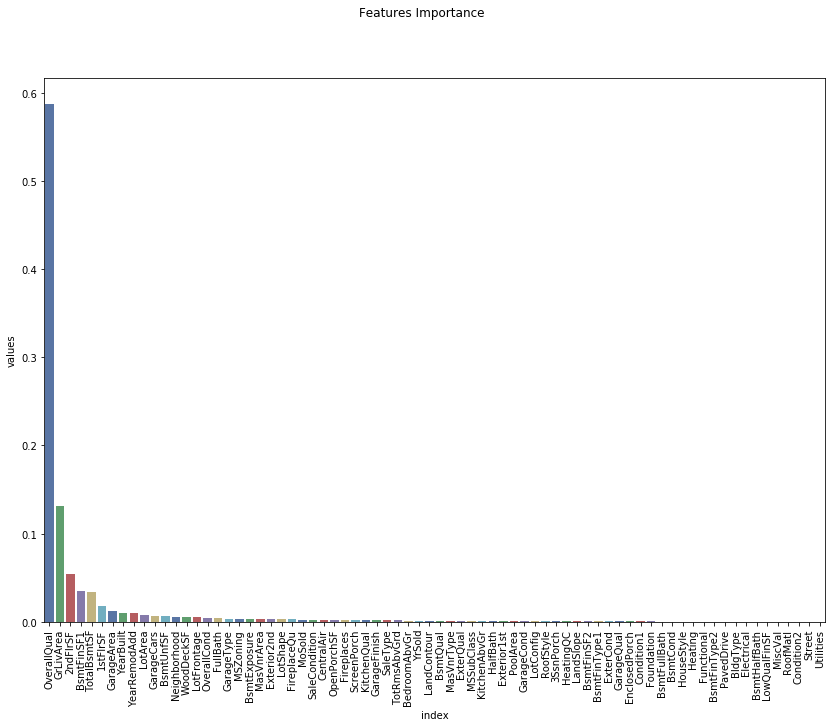

In [15]:
feature_import.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(14,10))
fig.suptitle('Features Importance')

sns.barplot(x='index', y='values', data=feature_import, palette='deep')
plt.xticks(rotation=90)
plt.show()

In [16]:
features_Importance = {}

for feat, importance in zip(X.columns, clf.feature_importances_):
    features_Importance[feat] = importance

#print 'feature: {f}, importance: {i}'.format(f=feat, i=importance)

In [17]:
features_Importance

{'1stFlrSF': 0.017618423845582806,
 '2ndFlrSF': 0.054365192948503185,
 '3SsnPorch': 0.0006070337235643625,
 'BedroomAbvGr': 0.0014879355787056675,
 'BldgType': 9.887864174033725e-05,
 'BsmtCond': 0.0003408213825576949,
 'BsmtExposure': 0.0030956508941445606,
 'BsmtFinSF1': 0.03490591993159277,
 'BsmtFinSF2': 0.000532874589686325,
 'BsmtFinType1': 0.0005079150644681481,
 'BsmtFinType2': 0.00016901398037747202,
 'BsmtFullBath': 0.0003562972938915701,
 'BsmtHalfBath': 4.840743670616211e-05,
 'BsmtQual': 0.0012470408657134576,
 'BsmtUnfSF': 0.00609094227881749,
 'CentralAir': 0.0023011695901827664,
 'Condition1': 0.00042312344579878745,
 'Condition2': 2.677894857583715e-06,
 'Electrical': 7.419617957224098e-05,
 'EnclosedPorch': 0.00043284431408496934,
 'ExterCond': 0.0004909139035304421,
 'ExterQual': 0.0012084841429210328,
 'Exterior1st': 0.0008800868101677724,
 'Exterior2nd': 0.0028586127936438836,
 'FireplaceQu': 0.0027324484567114093,
 'Fireplaces': 0.0019655769924941746,
 'Foundation

In [18]:
Important_Features = [key for key, value in features_Importance.iteritems() if value > features_Importance['GarageType']]
Important_Features

['BsmtUnfSF',
 '2ndFlrSF',
 'OverallQual',
 'OverallCond',
 'LotArea',
 'GrLivArea',
 'YearRemodAdd',
 'LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'FullBath',
 'WoodDeckSF',
 '1stFlrSF',
 'YearBuilt',
 'Neighborhood',
 'GarageArea',
 'GarageCars']

In [19]:
Selected_features = X[Important_Features]
Selected_features.head()

,BsmtUnfSF,2ndFlrSF,OverallQual,OverallCond,LotArea,GrLivArea,YearRemodAdd,LotFrontage,BsmtFinSF1,TotalBsmtSF,FullBath,WoodDeckSF,1stFlrSF,YearBuilt,Neighborhood,GarageArea,GarageCars
0,150,854,7,5,8450,1710,2003,65.0,706,856,2,0,856,2003,5,548,2
1,284,0,6,8,9600,1262,1976,80.0,978,1262,2,298,1262,1976,24,460,2
2,434,866,7,5,11250,1786,2002,68.0,486,920,2,0,920,2001,5,608,2
3,540,756,7,5,9550,1717,1970,60.0,216,756,1,0,961,1915,6,642,3
4,490,1053,8,5,14260,2198,2000,84.0,655,1145,2,192,1145,2000,15,836,3


In [20]:
dataset = Selected_features.join(Y)
dataset.head()

,BsmtUnfSF,2ndFlrSF,OverallQual,OverallCond,LotArea,GrLivArea,YearRemodAdd,LotFrontage,BsmtFinSF1,TotalBsmtSF,FullBath,WoodDeckSF,1stFlrSF,YearBuilt,Neighborhood,GarageArea,GarageCars,SalePrice
0,150,854,7,5,8450,1710,2003,65.0,706,856,2,0,856,2003,5,548,2,208500
1,284,0,6,8,9600,1262,1976,80.0,978,1262,2,298,1262,1976,24,460,2,181500
2,434,866,7,5,11250,1786,2002,68.0,486,920,2,0,920,2001,5,608,2,223500
3,540,756,7,5,9550,1717,1970,60.0,216,756,1,0,961,1915,6,642,3,140000
4,490,1053,8,5,14260,2198,2000,84.0,655,1145,2,192,1145,2000,15,836,3,250000


### Visualise the Data

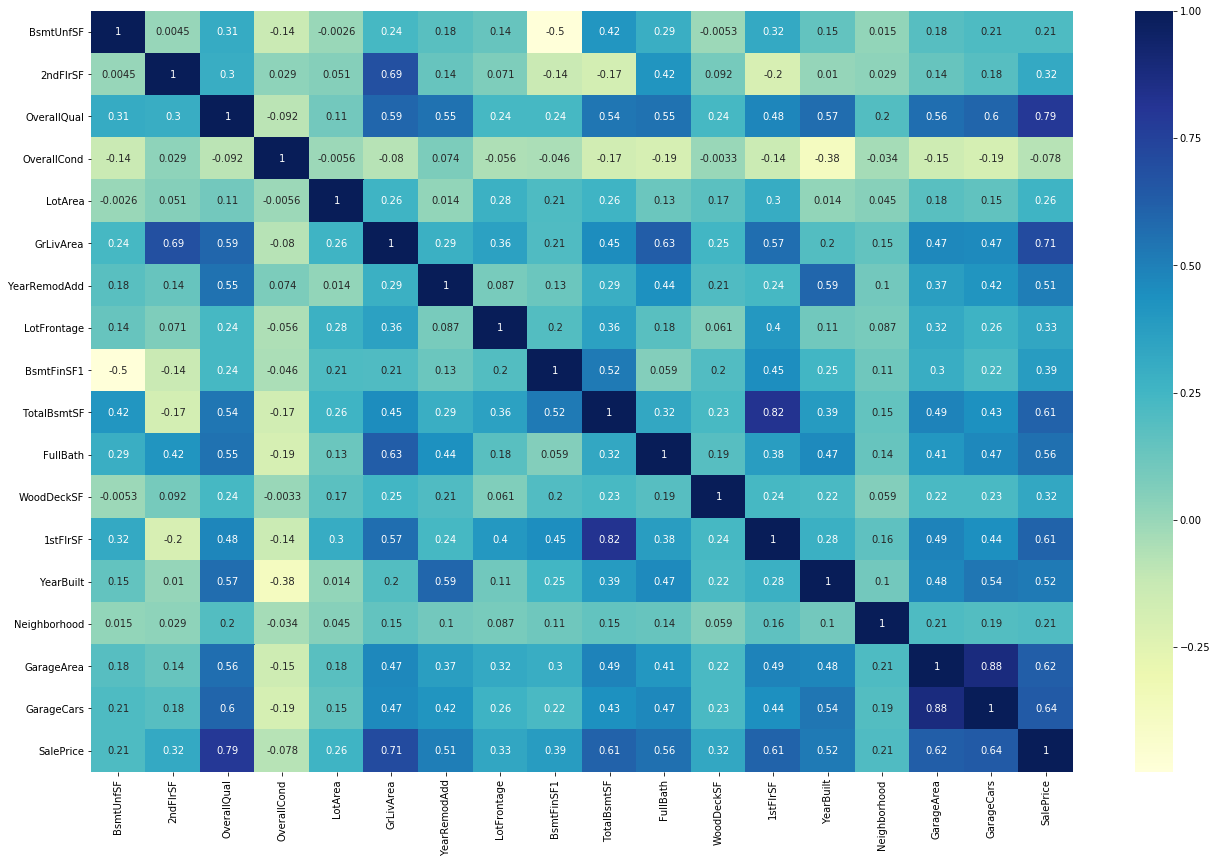

In [21]:
plt.subplots(figsize=(22,14))

corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu");

### Validate the Dataset

In [22]:
# Split-out validation dataset
Y = dataset['SalePrice']
X = dataset.drop('SalePrice', axis=1)

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### Baseline Evaluation of Algorithms

In [23]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'r2' #root mean square
print '''R Square (or coefficient of determination) provides an indication of the goodness of fit of a set of predictions 
to the actual values. Varies between 0 and 1 (0 for no-fit and 1 for perfect fit)'''

R Square (or coefficient of determination) provides an indication of the goodness of fit of a set of predictions 
to the actual values. Varies between 0 and 1 (0 for no-fit and 1 for perfect fit)


In [24]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVR', SVR()))

In [25]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.738646 (0.187820)


C:\Users\Muyiwa\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LASSO: 0.738648 (0.187829)
EN: 0.729921 (0.199941)
KNN: 0.630766 (0.132714)
CART: 0.706458 (0.105912)


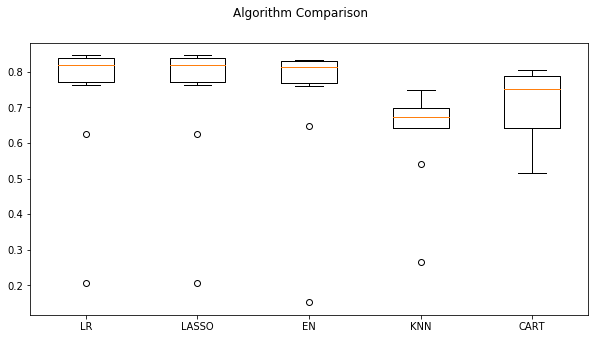

In [26]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Evaluate Algorithms: Standardization

In [27]:
# Standardize the dataset
pipelines = []
pipelines.append(('Linear Regression', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())]))) #-7570255309135803392.000000
'''R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.'''

pipelines.append(('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())]))) 
pipelines.append(('Elastic Net', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('K-Nearest Neighbour', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('Decision Tree Regressor', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
#pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear Regression: 0.738646 (0.187820)
LASSO: 0.738679 (0.187777)
Elastic Net: 0.740536 (0.140848)
K-Nearest Neighbour: 0.792997 (0.100551)
Decision Tree Regressor: 0.733483 (0.102309)


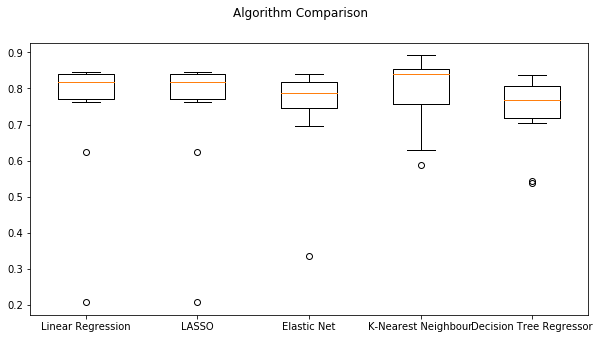

In [28]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Performance Tuning

In [29]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [30]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.800721 using {'n_neighbors': 7}
0.713090 (0.182141) with: {'n_neighbors': 1}
0.779778 (0.130418) with: {'n_neighbors': 3}
0.792751 (0.101879) with: {'n_neighbors': 5}
0.800721 (0.091690) with: {'n_neighbors': 7}
0.797092 (0.084688) with: {'n_neighbors': 9}
0.800569 (0.076889) with: {'n_neighbors': 11}
0.798751 (0.072916) with: {'n_neighbors': 13}
0.793062 (0.069395) with: {'n_neighbors': 15}
0.793040 (0.065454) with: {'n_neighbors': 17}
0.790955 (0.063873) with: {'n_neighbors': 19}
0.791232 (0.062642) with: {'n_neighbors': 21}



### Ensemble Methods

In [31]:
ensembles = []
ensembles.append(('Random Forest Regression', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('Gradient Boosting Regression', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('Extra Trees Regression', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('AdaBoost Regression', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Random Forest Regression: 0.789029 (0.076325)
Gradient Boosting Regression: 0.857791 (0.069646)
Extra Trees Regression: 0.827274 (0.087414)
AdaBoost Regression: 0.826099 (0.144099)


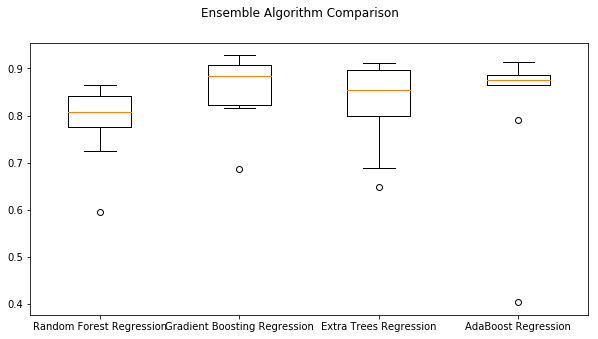

In [32]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Tune Ensemble Methods

In [33]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [34]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852765 using {'n_estimators': 200}
0.842380 (0.077323) with: {'n_estimators': 50}
0.850347 (0.081944) with: {'n_estimators': 100}
0.852634 (0.080883) with: {'n_estimators': 150}
0.852765 (0.080735) with: {'n_estimators': 200}
0.852045 (0.080517) with: {'n_estimators': 250}
0.851775 (0.080023) with: {'n_estimators': 300}
0.851260 (0.080177) with: {'n_estimators': 350}
0.851618 (0.078990) with: {'n_estimators': 400}


### Finalise Model

In [35]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False)

r_2 statistic: 0.91


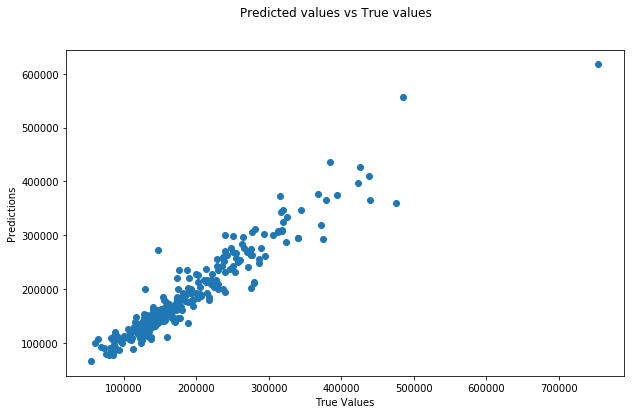

In [36]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(r2_score(Y_validation, predictions))
#model.score(X_test, y_test)

# Now, we can calculate the models accuracy metrics based on what the actual value of y was
#print("Mean squared error: %.2f"
#      % mean_squared_error(Y_validation, predictions))
print('r_2 statistic: %.2f' % r2_score(Y_validation, predictions))

fig = plt.figure(figsize=(10,6))
fig.suptitle('Predicted values vs True values')
plt.scatter(Y_validation, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()